In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
  
import numpy as np
import pandas as pd
import re
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline
from pylab import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
Base_dir='/data/nandas/Transcription/CombinedTimeSpaceConditions/'
os.chdir(Base_dir)
from scipy.signal import find_peaks
# from CatExp import *
import statsmodels as st
# import statsmodels.api as sm


ImportError: cannot import name 'factorial'

In [86]:
Tissue_dir='/data/nandas/Combined_coexp/Part_1_TranscriptionallyRegulatedGenes/Tissue/'
Kim_dir='/data/nandas/Transcription/KimDevTime_071620/'

In [3]:
mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',
                      index_col=0)
mapper_df=mapper_df.loc[mapper_df.index.dropna()]

In [4]:
def wb_to_gene(matrix):
    mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',index_col=1)
    mapper_df=mapper_df.loc[mapper_df.index.dropna()]
    wb_to_gene = {};
    for wb in mapper_df.index:
        wb_to_gene[wb] = str(mapper_df.loc[wb]['GeneName']);
    matrix=matrix.rename(index=wb_to_gene,columns=wb_to_gene)
    return matrix

def gene_to_wb(matrix):
    mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',index_col=2)
    mapper_df=mapper_df.loc[mapper_df.index.dropna()]
    gene_to_wb = {};
    for gene in mapper_df.index:
        gene_to_wb[gene] = str(mapper_df.loc[gene]['WormBaseID']);
    matrix=matrix.rename(index=gene_to_wb,columns=gene_to_wb)
    return matrix

def SeqToWB(matrix):
    mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',index_col=3)
    mapper_df=mapper_df.loc[mapper_df.index.dropna()]
    Seq_to_Wb = {};
    mapper_df=mapper_df[mapper_df.index!=np.nan]
    for seq in mapper_df.index:
        Seq_to_Wb[seq] = str(mapper_df.loc[seq]['WormBaseID']);
    matrix=matrix.rename(index=Seq_to_Wb,columns=Seq_to_Wb)
    return matrix

def SeqToGene(matrix):
    mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',index_col=3)
    mapper_df=mapper_df.loc[mapper_df.index.dropna()]
    Seq_to_Gene = {};
    mapper_df=mapper_df[mapper_df.index!=np.nan]
    for seq in mapper_df.index:
        Seq_to_Gene[seq] = str(mapper_df.loc[seq]['GeneName']);
    matrix=matrix.rename(index=Seq_to_Gene,columns=Seq_to_Gene)
    return matrix
    

## Reading development and tissue binning files

In [89]:
VS=pd.read_csv(Kim_dir+"Binning_021222.csv",index_col=0)

In [90]:
CoefVar=pd.read_csv(Tissue_dir+"CVTissue_AllGenes.csv",index_col=0)

In [91]:
intersect=list(set(VS.index).intersection(set(CoefVar.index)))

In [92]:
CommonVS=VS.loc[intersect]

In [93]:
CommonCoefVar=CoefVar.loc[intersect]

In [94]:
VS

,Variation Score,Gene Cluster,Bin
WormBaseID,,,
WBGene00020700,1.607023,9.0,3
WBGene00000608,1.595401,9.0,3
WBGene00000663,1.586700,9.0,3
WBGene00000694,1.579680,9.0,3
WBGene00011460,1.565983,9.0,3
...,...,...,...
WBGene00004306,0.000000,12.0,1
WBGene00006715,0.000000,12.0,1
WBGene00022785,0.000000,12.0,1


In [95]:
CommonVS=CommonVS[['Variation Score','Bin']]
CommonCoefVar=CommonCoefVar[['CoefVar','Bin']]

In [96]:
CommonVS['DevelopmentBin']=CommonVS['Bin']

In [97]:
CommonCoefVar['TissueBin']=CommonCoefVar['Bin']

In [98]:
CommonVSCoefVar=CommonCoefVar[['CoefVar','TissueBin']]

In [99]:
CommonVSCoefVar[['Variation Score','DevelopmentBin']]=CommonVS[['Variation Score','DevelopmentBin']]

In [100]:
CommonVSCoefVar

,CoefVar,TissueBin,Variation Score,DevelopmentBin
WormBaseID,,,,
WBGene00011985,1.659006,Highly variant,0.054513,2
WBGene00008485,2.424174,Highly variant,0.485177,3
WBGene00016134,2.426214,Highly variant,0.006843,2
WBGene00000950,2.038499,Highly variant,0.013586,2
WBGene00044029,1.145128,Highly variant,0.202503,3
...,...,...,...,...
WBGene00011807,0.639272,Moderately variant,0.000000,1
WBGene00022802,1.489352,Highly variant,0.275850,3
WBGene00004503,0.387512,Moderately variant,0.015066,2


In [101]:
CommonVS=pd.DataFrame(CommonVS)
CommonCoefVar=pd.DataFrame(CommonCoefVar)

In [102]:
# CommonVSCoefVar['DevelopmentBin']=str(CommonVSCoefVar['DevelopmentBin'])

In [103]:
CommonVSCoefVar

,CoefVar,TissueBin,Variation Score,DevelopmentBin
WormBaseID,,,,
WBGene00011985,1.659006,Highly variant,0.054513,2
WBGene00008485,2.424174,Highly variant,0.485177,3
WBGene00016134,2.426214,Highly variant,0.006843,2
WBGene00000950,2.038499,Highly variant,0.013586,2
WBGene00044029,1.145128,Highly variant,0.202503,3
...,...,...,...,...
WBGene00011807,0.639272,Moderately variant,0.000000,1
WBGene00022802,1.489352,Highly variant,0.275850,3
WBGene00004503,0.387512,Moderately variant,0.015066,2


In [104]:
LowExpKim=pd.read_csv(Kim_dir+"LowExp_Kim.csv",index_col=0)

In [105]:
LowExpKim

,DH2_N2_0,DH2_N2_2,DH2_N2_4,DH2_N2_6,DH2_N2_8,DH2_N2_10,DH2_N2_12,DH2_N2_14,DH2_N2_16,DH2_N2_18,...,DH2_N2_32,DH2_N2_34,DH2_N2_36,DH2_N2_38,DH5_N2_38,DH5_N2_40,DH5_N2_42,DH5_N2_44,DH5_N2_46,DH5_N2_48
WormBaseID,,,,,,,,,,,,,,,,,,,,,
WBGene00012335,1.012198,1.489701,0.738886,0.629337,0.171848,0.097373,0.098352,0.228040,0.179612,NaN,...,NaN,0.084695,0.065306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WBGene00005169,0.303189,0.364411,0.484143,0.659780,0.360321,0.204166,0.206219,0.159381,0.062767,NaN,...,0.080979,0.147987,0.136929,0.161941,0.213330,0.188588,0.056753,0.057094,0.056694,0.023326
WBGene00005565,0.257818,NaN,0.082339,0.224419,0.076600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WBGene00001667,0.507856,0.627847,0.681209,0.618892,0.482845,0.444585,0.656312,0.480547,1.324733,0.544404,...,0.461189,0.446195,0.435791,NaN,0.428805,0.379073,0.399269,0.487741,0.256407,0.164103
WBGene00018443,0.059516,0.490518,0.114045,0.103612,0.070731,0.040078,0.080962,NaN,0.147854,NaN,...,NaN,NaN,0.026879,NaN,0.031407,NaN,NaN,NaN,0.033387,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBGene00007727,NaN,0.054514,0.135194,0.046060,NaN,NaN,0.071982,0.041724,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029893,0.178104,0.195409
WBGene00044284,0.280497,0.192650,0.477768,NaN,NaN,NaN,NaN,NaN,0.232276,NaN,...,0.249727,NaN,NaN,NaN,NaN,NaN,0.210021,0.105642,NaN,NaN
WBGene00005081,1.653349,0.879133,0.579125,0.417822,0.380304,0.395063,0.253932,0.336439,0.132496,0.142930,...,0.085470,0.187433,0.120436,0.170921,0.140725,0.099523,0.119801,0.210911,0.179515,0.295435


In [106]:
list(set(LowExpKim.index).intersection(set(CommonVSCoefVar.index)))

[]

In [107]:
(CommonVSCoefVar['DevelopmentBin']).replace(3,'Highly variant',inplace=True)
(CommonVSCoefVar['DevelopmentBin']).replace(2,'Moderately variant',inplace=True)
(CommonVSCoefVar['DevelopmentBin']).replace(1,'Invariant',inplace=True)

In [108]:
np.unique(CommonVSCoefVar.TissueBin)

array(['Highly variant', 'Invariant', 'Lowly expressed',
       'Moderately variant'], dtype=object)

In [109]:
CommonVSCoefVar[CommonVSCoefVar.TissueBin=='Lowly expressed']

,CoefVar,TissueBin,Variation Score,DevelopmentBin
WormBaseID,,,,
WBGene00016008,NaN,Lowly expressed,0.103095,Moderately variant
WBGene00022654,NaN,Lowly expressed,0.951210,Highly variant
WBGene00019364,NaN,Lowly expressed,0.155110,Moderately variant
WBGene00008336,NaN,Lowly expressed,0.141996,Moderately variant
WBGene00018601,NaN,Lowly expressed,0.755670,Highly variant
...,...,...,...,...
WBGene00008597,NaN,Lowly expressed,0.439219,Highly variant
WBGene00021407,NaN,Lowly expressed,0.471329,Highly variant
WBGene00001108,NaN,Lowly expressed,1.030730,Highly variant


In [110]:
for genes in CommonVSCoefVar.index:
#     print(genes)
    if genes in LowExpKim.index:
        print(genes)
        CommonVSCoefVar.at[genes,'DevelopmentBin']='Lowly expressed'
        print(CommonVSCoefVar.loc[genes,'DevelopmentBin'])
#     elif (CommonVSCoefVar.loc[genes,'DevelopmentBin'])==1:
#         CommonVSCoefVar.at[genes,'DevelopmentBin']='Invariant'
#     elif (CommonVSCoefVar.loc[genes,'DevelopmentBin'])==3:
#         print(type((CommonVSCoefVar.loc[genes,'DevelopmentBin'])))
#         CommonVSCoefVar.at[genes,'DevelopmentBin']='Highly variant'
#     elif (CommonVSCoefVar.loc[genes,'DevelopmentBin'])==2:
#         CommonVSCoefVar.at[genes,'DevelopmentBin']='Moderately variant'

In [111]:
np.unique(CommonVSCoefVar.DevelopmentBin)

array(['Highly variant', 'Invariant', 'Moderately variant'], dtype=object)

## Removing genes that are lowly expressed in both development and tissues

In [112]:
count=0
for genes in CommonVSCoefVar.index:
    if (CommonVSCoefVar.loc[genes,'DevelopmentBin'])=='Lowly expressed' :
        if  (CommonVSCoefVar.loc[genes,'TissueBin'])=='Lowly expressed':
            print(genes)
            count=count+1
            print(count)
            CommonVSCoefVar.drop(index=genes,inplace=True)

In [113]:
CommonVSCoefVar

,CoefVar,TissueBin,Variation Score,DevelopmentBin
WormBaseID,,,,
WBGene00011985,1.659006,Highly variant,0.054513,Moderately variant
WBGene00008485,2.424174,Highly variant,0.485177,Highly variant
WBGene00016134,2.426214,Highly variant,0.006843,Moderately variant
WBGene00000950,2.038499,Highly variant,0.013586,Moderately variant
WBGene00044029,1.145128,Highly variant,0.202503,Highly variant
...,...,...,...,...
WBGene00011807,0.639272,Moderately variant,0.000000,Invariant
WBGene00022802,1.489352,Highly variant,0.275850,Highly variant
WBGene00004503,0.387512,Moderately variant,0.015066,Moderately variant


## Quadrant enrichment of all genes

In [114]:
for gene in CommonVSCoefVar.index:
    CV=CommonVSCoefVar.loc[gene]['TissueBin']
    VS=CommonVSCoefVar.loc[gene]['DevelopmentBin']
    if VS=='Highly variant' and CV=='Highly variant':
        CommonVSCoefVar.at[gene,'Quadrant']=4
    elif VS=='Highly variant' and CV!='Highly variant':
        CommonVSCoefVar.at[gene,'Quadrant']=2
    elif VS!='Highly variant' and CV=='Highly variant':
        CommonVSCoefVar.at[gene,'Quadrant']=3
    else:
        CommonVSCoefVar.at[gene,'Quadrant']=1

In [115]:
MetabolicClasses=pd.read_csv("/data/nandas/MetabolicClasses_August_SN_090221.csv",index_col=0)

In [116]:
CommonVSCoefVar

,CoefVar,TissueBin,Variation Score,DevelopmentBin,Quadrant
WormBaseID,,,,,
WBGene00011985,1.659006,Highly variant,0.054513,Moderately variant,3.0
WBGene00008485,2.424174,Highly variant,0.485177,Highly variant,4.0
WBGene00016134,2.426214,Highly variant,0.006843,Moderately variant,3.0
WBGene00000950,2.038499,Highly variant,0.013586,Moderately variant,3.0
WBGene00044029,1.145128,Highly variant,0.202503,Highly variant,4.0
...,...,...,...,...,...
WBGene00011807,0.639272,Moderately variant,0.000000,Invariant,1.0
WBGene00022802,1.489352,Highly variant,0.275850,Highly variant,4.0
WBGene00004503,0.387512,Moderately variant,0.015066,Moderately variant,1.0


In [117]:
CommonVSCoefVar['Class']=MetabolicClasses['Class']

In [118]:
CommonVSCoefVar.Class.sort_values(ascending=False)

WormBaseID
WBGene00021148      D
WBGene00022191      D
WBGene00044546      D
WBGene00019236      D
WBGene00018523      D
                 ... 
WBGene00011807    NaN
WBGene00022802    NaN
WBGene00004503    NaN
WBGene00022018    NaN
WBGene00006955    NaN
Name: Class, Length: 14556, dtype: object

In [119]:
CommonVSCoefVar

,CoefVar,TissueBin,Variation Score,DevelopmentBin,Quadrant,Class
WormBaseID,,,,,,
WBGene00011985,1.659006,Highly variant,0.054513,Moderately variant,3.0,NaN
WBGene00008485,2.424174,Highly variant,0.485177,Highly variant,4.0,A
WBGene00016134,2.426214,Highly variant,0.006843,Moderately variant,3.0,NaN
WBGene00000950,2.038499,Highly variant,0.013586,Moderately variant,3.0,NaN
WBGene00044029,1.145128,Highly variant,0.202503,Highly variant,4.0,NaN
...,...,...,...,...,...,...
WBGene00011807,0.639272,Moderately variant,0.000000,Invariant,1.0,NaN
WBGene00022802,1.489352,Highly variant,0.275850,Highly variant,4.0,NaN
WBGene00004503,0.387512,Moderately variant,0.015066,Moderately variant,1.0,NaN


In [120]:
AllGenesQuadrant1=CommonVSCoefVar[CommonVSCoefVar.Quadrant==1]
AllGenesQuadrant2=CommonVSCoefVar[CommonVSCoefVar.Quadrant==2]
AllGenesQuadrant3=CommonVSCoefVar[CommonVSCoefVar.Quadrant==3]
AllGenesQuadrant4=CommonVSCoefVar[CommonVSCoefVar.Quadrant==4]

In [121]:
totalmetabolic=list(set(CommonVSCoefVar.index).intersection(set(MetabolicClasses.index)))

In [122]:
MetabolicCommonVSCoefVar=CommonVSCoefVar.loc[totalmetabolic]

In [123]:
MetabolicCommonVSCoefVar['WormBase ID']=MetabolicCommonVSCoefVar.index

In [124]:
MetabolicCommonVSCoefVar=wb_to_gene(MetabolicCommonVSCoefVar)

In [125]:
MetabolicCommonVSCoefVar.to_csv("QuadrantCategoriesMetabolic.csv")

In [126]:
metabolicq1=list(set(MetabolicClasses.index).intersection(set(AllGenesQuadrant1.index)))
MetabolicGenesQuadrant1=AllGenesQuadrant1.loc[metabolicq1]

In [127]:
metabolicq2=list(set(MetabolicClasses.index).intersection(set(AllGenesQuadrant2.index)))
MetabolicGenesQuadrant2=AllGenesQuadrant2.loc[metabolicq2]
metabolicq3=list(set(MetabolicClasses.index).intersection(set(AllGenesQuadrant3.index)))
MetabolicGenesQuadrant3=AllGenesQuadrant3.loc[metabolicq3]
metabolicq4=list(set(MetabolicClasses.index).intersection(set(AllGenesQuadrant4.index)))
MetabolicGenesQuadrant4=AllGenesQuadrant4.loc[metabolicq4]

In [128]:
len(AllGenesQuadrant2.index)

2346

In [129]:
PercentageQ1=(len(metabolicq1)*100)/len(AllGenesQuadrant1.index)
PercentageQ2=(len(metabolicq2)*100)/len(AllGenesQuadrant2.index)
PercentageQ3=(len(metabolicq3)*100)/len(AllGenesQuadrant3.index)
PercentageQ4=(len(metabolicq4)*100)/len(AllGenesQuadrant4.index)

In [130]:
PercentageQ4

12.15504529176322

In [131]:
def hypergeom(x,M,n,N):
    #M is the population size (previously N)
    #n is the number of successes in the population (previously K)
    #N is the sample size (previously n)
    #X is still the number of drawn “successes”.
    from scipy.stats import hypergeom
    pval = hypergeom.sf(x-1, M, n, N)
    return pval

In [132]:
len(totalmetabolic)/len(CommonVSCoefVar.index)

0.1499725199230558

In [133]:
len(totalmetabolic)

2183

In [134]:
pvalq1=hypergeom(x=len(metabolicq1),N=len(AllGenesQuadrant1.index),n=len(totalmetabolic),
                 M=len((CommonVSCoefVar.index)))

In [135]:
pvalq2=hypergeom(x=len(metabolicq2),N=len(AllGenesQuadrant2.index),n=len(totalmetabolic),
                 M=len((CommonVSCoefVar.index)))

In [136]:
pvalq3=hypergeom(x=len(metabolicq3),N=len(AllGenesQuadrant3.index),n=len(totalmetabolic),
                 M=len((CommonVSCoefVar.index)))

In [137]:
pvalq4=hypergeom(x=len(metabolicq4),N=len(AllGenesQuadrant4.index),n=len(totalmetabolic),
                 M=len((CommonVSCoefVar.index)))

## Extracting metabolic VS and CV from development and tissue dataset

In [138]:
MetabolicClasses=pd.read_csv("/data/nandas/MetabolicClasses_August_SN_090221.csv",index_col=0)

In [139]:
CommonVS

,Variation Score,Bin,DevelopmentBin
WormBaseID,,,
WBGene00011985,0.054513,2,2
WBGene00008485,0.485177,3,3
WBGene00016134,0.006843,2,2
WBGene00000950,0.013586,2,2
WBGene00044029,0.202503,3,3
...,...,...,...
WBGene00011807,0.000000,1,1
WBGene00022802,0.275850,3,3
WBGene00004503,0.015066,2,2


In [140]:
MetabolicVS=list(set(CommonVSCoefVar.index).intersection(set(MetabolicClasses.index)))
MetabolicVS=MetabolicClasses.loc[MetabolicVS]

In [141]:
MetabolicVS ['Variation Score']=CommonVS ['Variation Score']
MetabolicVS ['DevelopmentBin']= CommonVS ['DevelopmentBin']

In [142]:
MetabolicCoefVar=list(set(CommonCoefVar.index).intersection(set(MetabolicClasses.index)))
MetabolicCoefVar=MetabolicClasses.loc[MetabolicCoefVar]

In [143]:
MetabolicCoefVar ['CoefVar']=CommonCoefVar.CoefVar
MetabolicCoefVar['TissueBin']=CommonCoefVar['TissueBin']

In [144]:
MetabolicVS

,Sequence Name,Class,Molecular Function,iCEL1273 description / Notes,Wormbase Description Text,Variation Score,DevelopmentBin
Gene Name,,,,,,,
WBGene00003477,H28G03.6,C,lipid phosphatase,NaN,mtm-5 encodes a catalytically inactive myotubu...,0.012970,2
WBGene00008485,F01D4.1,A,UDP-glucuronosyl transferase,Pentose and glucuronate interconversions; Porp...,ugt-43 is an ortholog of human UGT3A2 (UDP gly...,0.485177,3
WBGene00006418,B0222.4,A,sphingosine-1-phosphate lyase,Sphingolipid metabolism,tag-38 is an ortholog of human SGPL1 (sphingos...,0.081883,2
WBGene00020950,W02F12.5,A,dihydrolipoamide S-succinyltransferase,Citrate cycle (TCA cycle); Lysine degradation,dlst-1 is an ortholog of human DLST (dihydroli...,0.000000,1
WBGene00000212,ZK455.4,A,Acid sphingomyelinase,Sphingolipid metabolism,asm-2 encodes a protein similar to human acid ...,0.067848,2
...,...,...,...,...,...,...,...
WBGene00014054,ZK669.4,A,DIHYDROLIPOAMIDE BRANCHED CHAIN TRANSACYLASE,"Propanoate metabolism; Valine, leucine and iso...",ZK669.4 is orthologous to the human gene DIHYD...,0.005625,2
WBGene00008410,D2023.6,C,Ubiquinone biosynthesis,"paralog to coq-8, ubiquinone biosynthesis",D2023.6 is orthologous to a set of uncharacter...,0.084869,2
WBGene00006566,ZK829.6,B,tRNA-guanine transglycosylase,NaN,tgt-1 encodes a tRNA-guanine transglycosylase ...,0.006686,2


In [145]:
for gene in MetabolicCoefVar.index:
    CV=MetabolicCoefVar.loc[gene]['TissueBin']
    VS=MetabolicVS.loc[gene]['DevelopmentBin']
    if VS=='Highly variant' and CV=='Highly variant':
        MetabolicCoefVar.at[gene,'Quadrant']=4
    elif VS=='Highly variant' and CV!='Highly variant':
        MetabolicCoefVar.at[gene,'Quadrant']=2
    elif VS!='Highly variant' and CV=='Highly variant':
        MetabolicCoefVar.at[gene,'Quadrant']=3
    else:
        MetabolicCoefVar.at[gene,'Quadrant']=1

In [146]:
# MetabolicCoefVar ['TissueBin']=CoefVar['Tissue bin']

In [147]:
MetabolicCoefVar

,Sequence Name,Class,Molecular Function,iCEL1273 description / Notes,Wormbase Description Text,CoefVar,TissueBin,Quadrant
Gene Name,,,,,,,,
WBGene00003477,H28G03.6,C,lipid phosphatase,NaN,mtm-5 encodes a catalytically inactive myotubu...,0.862214,Highly variant,3.0
WBGene00008485,F01D4.1,A,UDP-glucuronosyl transferase,Pentose and glucuronate interconversions; Porp...,ugt-43 is an ortholog of human UGT3A2 (UDP gly...,2.424174,Highly variant,3.0
WBGene00006418,B0222.4,A,sphingosine-1-phosphate lyase,Sphingolipid metabolism,tag-38 is an ortholog of human SGPL1 (sphingos...,1.510227,Highly variant,3.0
WBGene00020950,W02F12.5,A,dihydrolipoamide S-succinyltransferase,Citrate cycle (TCA cycle); Lysine degradation,dlst-1 is an ortholog of human DLST (dihydroli...,0.529972,Moderately variant,1.0
WBGene00000212,ZK455.4,A,Acid sphingomyelinase,Sphingolipid metabolism,asm-2 encodes a protein similar to human acid ...,2.386914,Highly variant,3.0
...,...,...,...,...,...,...,...,...
WBGene00014054,ZK669.4,A,DIHYDROLIPOAMIDE BRANCHED CHAIN TRANSACYLASE,"Propanoate metabolism; Valine, leucine and iso...",ZK669.4 is orthologous to the human gene DIHYD...,0.501306,Moderately variant,1.0
WBGene00008410,D2023.6,C,Ubiquinone biosynthesis,"paralog to coq-8, ubiquinone biosynthesis",D2023.6 is orthologous to a set of uncharacter...,1.438169,Highly variant,3.0
WBGene00006566,ZK829.6,B,tRNA-guanine transglycosylase,NaN,tgt-1 encodes a tRNA-guanine transglycosylase ...,0.477919,Moderately variant,1.0


In [148]:
Lowlyexpressed=MetabolicCoefVar[MetabolicCoefVar.TissueBin=='Lowly expressed']

In [149]:
# MetabolicCoefVar.TissueBin)

In [150]:
# MetabolicCoefVar['TissueBin']=CoefVar['Bin']

In [151]:
MetabolicCoefVar

,Sequence Name,Class,Molecular Function,iCEL1273 description / Notes,Wormbase Description Text,CoefVar,TissueBin,Quadrant
Gene Name,,,,,,,,
WBGene00003477,H28G03.6,C,lipid phosphatase,NaN,mtm-5 encodes a catalytically inactive myotubu...,0.862214,Highly variant,3.0
WBGene00008485,F01D4.1,A,UDP-glucuronosyl transferase,Pentose and glucuronate interconversions; Porp...,ugt-43 is an ortholog of human UGT3A2 (UDP gly...,2.424174,Highly variant,3.0
WBGene00006418,B0222.4,A,sphingosine-1-phosphate lyase,Sphingolipid metabolism,tag-38 is an ortholog of human SGPL1 (sphingos...,1.510227,Highly variant,3.0
WBGene00020950,W02F12.5,A,dihydrolipoamide S-succinyltransferase,Citrate cycle (TCA cycle); Lysine degradation,dlst-1 is an ortholog of human DLST (dihydroli...,0.529972,Moderately variant,1.0
WBGene00000212,ZK455.4,A,Acid sphingomyelinase,Sphingolipid metabolism,asm-2 encodes a protein similar to human acid ...,2.386914,Highly variant,3.0
...,...,...,...,...,...,...,...,...
WBGene00014054,ZK669.4,A,DIHYDROLIPOAMIDE BRANCHED CHAIN TRANSACYLASE,"Propanoate metabolism; Valine, leucine and iso...",ZK669.4 is orthologous to the human gene DIHYD...,0.501306,Moderately variant,1.0
WBGene00008410,D2023.6,C,Ubiquinone biosynthesis,"paralog to coq-8, ubiquinone biosynthesis",D2023.6 is orthologous to a set of uncharacter...,1.438169,Highly variant,3.0
WBGene00006566,ZK829.6,B,tRNA-guanine transglycosylase,NaN,tgt-1 encodes a tRNA-guanine transglycosylase ...,0.477919,Moderately variant,1.0


In [152]:
for index in MetabolicCoefVar.index:
    if index in Lowlyexpressed.index:
        MetabolicCoefVar.at[index,'TissueBin']="Lowlyexpressed"

In [153]:
MetabolicCoefVar['VS']=MetabolicVS['Variation Score']

In [168]:
MetabolicCoefVar['DevelopmentBin']=MetabolicVS['DevelopmentBin']

In [169]:
MetabolicCoefVar

,Sequence Name,Class,Molecular Function,iCEL1273 description / Notes,Wormbase Description Text,CoefVar,TissueBin,Quadrant,VS,DevelopmentBin
Gene Name,,,,,,,,,,
WBGene00003477,H28G03.6,C,lipid phosphatase,NaN,mtm-5 encodes a catalytically inactive myotubu...,0.862214,Highly variant,3.0,0.012970,2
WBGene00008485,F01D4.1,A,UDP-glucuronosyl transferase,Pentose and glucuronate interconversions; Porp...,ugt-43 is an ortholog of human UGT3A2 (UDP gly...,2.424174,Highly variant,3.0,0.485177,3
WBGene00006418,B0222.4,A,sphingosine-1-phosphate lyase,Sphingolipid metabolism,tag-38 is an ortholog of human SGPL1 (sphingos...,1.510227,Highly variant,3.0,0.081883,2
WBGene00020950,W02F12.5,A,dihydrolipoamide S-succinyltransferase,Citrate cycle (TCA cycle); Lysine degradation,dlst-1 is an ortholog of human DLST (dihydroli...,0.529972,Moderately variant,1.0,0.000000,1
WBGene00000212,ZK455.4,A,Acid sphingomyelinase,Sphingolipid metabolism,asm-2 encodes a protein similar to human acid ...,2.386914,Highly variant,3.0,0.067848,2
...,...,...,...,...,...,...,...,...,...,...
WBGene00014054,ZK669.4,A,DIHYDROLIPOAMIDE BRANCHED CHAIN TRANSACYLASE,"Propanoate metabolism; Valine, leucine and iso...",ZK669.4 is orthologous to the human gene DIHYD...,0.501306,Moderately variant,1.0,0.005625,2
WBGene00008410,D2023.6,C,Ubiquinone biosynthesis,"paralog to coq-8, ubiquinone biosynthesis",D2023.6 is orthologous to a set of uncharacter...,1.438169,Highly variant,3.0,0.084869,2
WBGene00006566,ZK829.6,B,tRNA-guanine transglycosylase,NaN,tgt-1 encodes a tRNA-guanine transglycosylase ...,0.477919,Moderately variant,1.0,0.006686,2


## Dividing metabolic genes into quadrants

In [156]:
## Common lowly expressed

In [157]:
LowExpKim

,DH2_N2_0,DH2_N2_2,DH2_N2_4,DH2_N2_6,DH2_N2_8,DH2_N2_10,DH2_N2_12,DH2_N2_14,DH2_N2_16,DH2_N2_18,...,DH2_N2_32,DH2_N2_34,DH2_N2_36,DH2_N2_38,DH5_N2_38,DH5_N2_40,DH5_N2_42,DH5_N2_44,DH5_N2_46,DH5_N2_48
WormBaseID,,,,,,,,,,,,,,,,,,,,,
WBGene00012335,1.012198,1.489701,0.738886,0.629337,0.171848,0.097373,0.098352,0.228040,0.179612,NaN,...,NaN,0.084695,0.065306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WBGene00005169,0.303189,0.364411,0.484143,0.659780,0.360321,0.204166,0.206219,0.159381,0.062767,NaN,...,0.080979,0.147987,0.136929,0.161941,0.213330,0.188588,0.056753,0.057094,0.056694,0.023326
WBGene00005565,0.257818,NaN,0.082339,0.224419,0.076600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WBGene00001667,0.507856,0.627847,0.681209,0.618892,0.482845,0.444585,0.656312,0.480547,1.324733,0.544404,...,0.461189,0.446195,0.435791,NaN,0.428805,0.379073,0.399269,0.487741,0.256407,0.164103
WBGene00018443,0.059516,0.490518,0.114045,0.103612,0.070731,0.040078,0.080962,NaN,0.147854,NaN,...,NaN,NaN,0.026879,NaN,0.031407,NaN,NaN,NaN,0.033387,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBGene00007727,NaN,0.054514,0.135194,0.046060,NaN,NaN,0.071982,0.041724,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029893,0.178104,0.195409
WBGene00044284,0.280497,0.192650,0.477768,NaN,NaN,NaN,NaN,NaN,0.232276,NaN,...,0.249727,NaN,NaN,NaN,NaN,NaN,0.210021,0.105642,NaN,NaN
WBGene00005081,1.653349,0.879133,0.579125,0.417822,0.380304,0.395063,0.253932,0.336439,0.132496,0.142930,...,0.085470,0.187433,0.120436,0.170921,0.140725,0.099523,0.119801,0.210911,0.179515,0.295435


In [158]:
MetabolicLowExpKim=list(set(MetabolicClasses.index).intersection(set(LowExpKim.index)))

In [159]:
MetabolicLowExpKim

['WBGene00008471',
 'WBGene00007361',
 'WBGene00012049',
 'WBGene00018264',
 'WBGene00011653',
 'WBGene00007954',
 'WBGene00009615',
 'WBGene00010392',
 'WBGene00019471',
 'WBGene00010775',
 'WBGene00020474',
 'WBGene00007829',
 'WBGene00015406',
 'WBGene00010391',
 'WBGene00007291',
 'WBGene00044003',
 'WBGene00020631',
 'WBGene00017723',
 'WBGene00006435',
 'WBGene00017061',
 'WBGene00018771',
 'WBGene00010694',
 'WBGene00010606',
 'WBGene00013873',
 'WBGene00008801',
 'WBGene00020900',
 'WBGene00008908',
 'WBGene00011655',
 'WBGene00009611',
 'WBGene00017024',
 'WBGene00013068',
 'WBGene00019613',
 'WBGene00019849',
 'WBGene00008491',
 'WBGene00010162',
 'WBGene00009312',
 'WBGene00012448',
 'WBGene00008479',
 'WBGene00009263',
 'WBGene00009153',
 'WBGene00011157',
 'WBGene00021741',
 'WBGene00008804',
 'WBGene00020503',
 'WBGene00008297',
 'WBGene00018842',
 'WBGene00011781',
 'WBGene00011797',
 'WBGene00019349',
 'WBGene00010762',
 'WBGene00015986',
 'WBGene00016776',
 'WBGene0002

In [161]:
MetabolicCoefVar['DevelopmentBin']

Gene Name
WBGene00003477    2
WBGene00008485    3
WBGene00006418    2
WBGene00020950    1
WBGene00000212    2
                 ..
WBGene00014054    2
WBGene00008410    2
WBGene00006566    2
WBGene00012815    3
WBGene00020006    2
Name: DevelopmentBin, Length: 2183, dtype: int64

In [71]:
MetabolicLowExpKim

['WBGene00008471',
 'WBGene00007361',
 'WBGene00012049',
 'WBGene00018264',
 'WBGene00011653',
 'WBGene00007954',
 'WBGene00009615',
 'WBGene00010392',
 'WBGene00019471',
 'WBGene00010775',
 'WBGene00020474',
 'WBGene00007829',
 'WBGene00015406',
 'WBGene00010391',
 'WBGene00007291',
 'WBGene00044003',
 'WBGene00020631',
 'WBGene00017723',
 'WBGene00006435',
 'WBGene00017061',
 'WBGene00018771',
 'WBGene00010694',
 'WBGene00010606',
 'WBGene00013873',
 'WBGene00008801',
 'WBGene00020900',
 'WBGene00008908',
 'WBGene00011655',
 'WBGene00009611',
 'WBGene00017024',
 'WBGene00013068',
 'WBGene00019613',
 'WBGene00019849',
 'WBGene00008491',
 'WBGene00010162',
 'WBGene00009312',
 'WBGene00012448',
 'WBGene00008479',
 'WBGene00009263',
 'WBGene00009153',
 'WBGene00011157',
 'WBGene00021741',
 'WBGene00008804',
 'WBGene00020503',
 'WBGene00008297',
 'WBGene00018842',
 'WBGene00011781',
 'WBGene00011797',
 'WBGene00019349',
 'WBGene00010762',
 'WBGene00015986',
 'WBGene00016776',
 'WBGene0002

In [166]:
MetabolicCoefVar['DevelopmentBin']=str(MetabolicCoefVar['DevelopmentBin'])

In [167]:
MetabolicCoefVar

,Sequence Name,Class,Molecular Function,iCEL1273 description / Notes,Wormbase Description Text,CoefVar,TissueBin,Quadrant,VS,DevelopmentBin
Gene Name,,,,,,,,,,
WBGene00003477,H28G03.6,C,lipid phosphatase,NaN,mtm-5 encodes a catalytically inactive myotubu...,0.862214,Highly variant,3.0,0.012970,Gene Name\nWBGene00003477 2\nWBGene00008485...
WBGene00008485,F01D4.1,A,UDP-glucuronosyl transferase,Pentose and glucuronate interconversions; Porp...,ugt-43 is an ortholog of human UGT3A2 (UDP gly...,2.424174,Highly variant,3.0,0.485177,Gene Name\nWBGene00003477 2\nWBGene00008485...
WBGene00006418,B0222.4,A,sphingosine-1-phosphate lyase,Sphingolipid metabolism,tag-38 is an ortholog of human SGPL1 (sphingos...,1.510227,Highly variant,3.0,0.081883,Gene Name\nWBGene00003477 2\nWBGene00008485...
WBGene00020950,W02F12.5,A,dihydrolipoamide S-succinyltransferase,Citrate cycle (TCA cycle); Lysine degradation,dlst-1 is an ortholog of human DLST (dihydroli...,0.529972,Moderately variant,1.0,0.000000,Gene Name\nWBGene00003477 2\nWBGene00008485...
WBGene00000212,ZK455.4,A,Acid sphingomyelinase,Sphingolipid metabolism,asm-2 encodes a protein similar to human acid ...,2.386914,Highly variant,3.0,0.067848,Gene Name\nWBGene00003477 2\nWBGene00008485...
...,...,...,...,...,...,...,...,...,...,...
WBGene00014054,ZK669.4,A,DIHYDROLIPOAMIDE BRANCHED CHAIN TRANSACYLASE,"Propanoate metabolism; Valine, leucine and iso...",ZK669.4 is orthologous to the human gene DIHYD...,0.501306,Moderately variant,1.0,0.005625,Gene Name\nWBGene00003477 2\nWBGene00008485...
WBGene00008410,D2023.6,C,Ubiquinone biosynthesis,"paralog to coq-8, ubiquinone biosynthesis",D2023.6 is orthologous to a set of uncharacter...,1.438169,Highly variant,3.0,0.084869,Gene Name\nWBGene00003477 2\nWBGene00008485...
WBGene00006566,ZK829.6,B,tRNA-guanine transglycosylase,NaN,tgt-1 encodes a tRNA-guanine transglycosylase ...,0.477919,Moderately variant,1.0,0.006686,Gene Name\nWBGene00003477 2\nWBGene00008485...


In [72]:
# (MetabolicCoefVar.loc[genes,'DevelopmentBin'])==2

KeyError: 'WBGene00006955'

In [170]:
# MetabolicCoefVar['DevelopmentBin']=str(MetabolicCoefVar['DevelopmentBin'])
for genes in MetabolicCoefVar.index:
    print(genes)
    if genes in MetabolicLowExpKim:
        print(genes)
        MetabolicCoefVar.at[genes,'Development Bin']='Lowlyexpressed'
        print(MetabolicCoefVar.loc[genes,'Development Bin'])
    elif (MetabolicCoefVar.loc[genes,'DevelopmentBin'])==1:
        MetabolicCoefVar.at[genes,'Development Bin']='Invariant'
    elif (MetabolicCoefVar.loc[genes,'DevelopmentBin'])==3:
        MetabolicCoefVar.at[genes,'Development Bin']='Highly variant'
    elif (MetabolicCoefVar.loc[genes,'DevelopmentBin'])==2:
        MetabolicCoefVar.at[genes,'Development Bin']='Moderately variant'
        

WBGene00003477
WBGene00008485
WBGene00006418
WBGene00020950
WBGene00000212
WBGene00016603
WBGene00003091
WBGene00006946
WBGene00008336
WBGene00022663
WBGene00001633
WBGene00008499
WBGene00009271
WBGene00010411
WBGene00017719
WBGene00007089
WBGene00000207
WBGene00011631
WBGene00011321
WBGene00006915
WBGene00011559
WBGene00007836
WBGene00012166
WBGene00022770
WBGene00004893
WBGene00020139
WBGene00018657
WBGene00016863
WBGene00006910
WBGene00010197
WBGene00019246
WBGene00001405
WBGene00003095
WBGene00007533
WBGene00002029
WBGene00015509
WBGene00001336
WBGene00004257
WBGene00000210
WBGene00015861
WBGene00013904
WBGene00001553
WBGene00019937
WBGene00013807
WBGene00013103
WBGene00012007
WBGene00011232
WBGene00001177
WBGene00001073
WBGene00020151
WBGene00019682
WBGene00001246
WBGene00017775
WBGene00019229
WBGene00018408
WBGene00020419
WBGene00019473
WBGene00008408
WBGene00021314
WBGene00000254
WBGene00014148
WBGene00017565
WBGene00019516
WBGene00000913
WBGene00011004
WBGene00008290
WBGene0001

WBGene00019515
WBGene00019404
WBGene00007113
WBGene00012890
WBGene00015678
WBGene00015538
WBGene00013127
WBGene00020107
WBGene00000197
WBGene00007917
WBGene00010988
WBGene00017769
WBGene00015019
WBGene00015464
WBGene00017087
WBGene00021331
WBGene00006914
WBGene00007202
WBGene00017874
WBGene00015284
WBGene00023489
WBGene00007854
WBGene00015062
WBGene00021260
WBGene00000113
WBGene00009903
WBGene00020446
WBGene00014076
WBGene00016920
WBGene00016274
WBGene00008936
WBGene00016163
WBGene00022178
WBGene00019127
WBGene00021636
WBGene00022199
WBGene00007210
WBGene00014251
WBGene00008749
WBGene00012094
WBGene00008426
WBGene00018370
WBGene00009583
WBGene00001535
WBGene00007465
WBGene00017026
WBGene00014027
WBGene00016140
WBGene00018573
WBGene00022427
WBGene00013896
WBGene00008546
WBGene00007974
WBGene00000481
WBGene00006609
WBGene00008985
WBGene00007963
WBGene00001628
WBGene00007122
WBGene00000245
WBGene00011731
WBGene00015519
WBGene00009818
WBGene00020394
WBGene00014115
WBGene00022766
WBGene0001

WBGene00009908
WBGene00010759
WBGene00009740
WBGene00044063
WBGene00021148
WBGene00011092
WBGene00009204
WBGene00016144
WBGene00016934
WBGene00012375
WBGene00013041
WBGene00019055
WBGene00006935
WBGene00020964
WBGene00021917
WBGene00001773
WBGene00015660
WBGene00011065
WBGene00002497
WBGene00022389
WBGene00016595
WBGene00021464
WBGene00004932
WBGene00016402
WBGene00008925
WBGene00016207
WBGene00022031
WBGene00020007
WBGene00044620
WBGene00011884
WBGene00001607
WBGene00015814
WBGene00000989
WBGene00022188
WBGene00019096
WBGene00016355
WBGene00000115
WBGene00019235
WBGene00009262
WBGene00013266
WBGene00009805
WBGene00001754
WBGene00001394
WBGene00015551
WBGene00012045
WBGene00010436
WBGene00011768
WBGene00013577
WBGene00013361
WBGene00017060
WBGene00007096
WBGene00015540
WBGene00008486
WBGene00008531
WBGene00019710
WBGene00022130
WBGene00007536
WBGene00008780
WBGene00016669
WBGene00019329
WBGene00020113
WBGene00020765
WBGene00012017
WBGene00020397
WBGene00016996
WBGene00017092
WBGene0002

In [171]:
MetabolicCoefVar

,Sequence Name,Class,Molecular Function,iCEL1273 description / Notes,Wormbase Description Text,CoefVar,TissueBin,Quadrant,VS,DevelopmentBin,Development Bin
Gene Name,,,,,,,,,,,
WBGene00003477,H28G03.6,C,lipid phosphatase,NaN,mtm-5 encodes a catalytically inactive myotubu...,0.862214,Highly variant,3.0,0.012970,2,Moderately variant
WBGene00008485,F01D4.1,A,UDP-glucuronosyl transferase,Pentose and glucuronate interconversions; Porp...,ugt-43 is an ortholog of human UGT3A2 (UDP gly...,2.424174,Highly variant,3.0,0.485177,3,Highly variant
WBGene00006418,B0222.4,A,sphingosine-1-phosphate lyase,Sphingolipid metabolism,tag-38 is an ortholog of human SGPL1 (sphingos...,1.510227,Highly variant,3.0,0.081883,2,Moderately variant
WBGene00020950,W02F12.5,A,dihydrolipoamide S-succinyltransferase,Citrate cycle (TCA cycle); Lysine degradation,dlst-1 is an ortholog of human DLST (dihydroli...,0.529972,Moderately variant,1.0,0.000000,1,Invariant
WBGene00000212,ZK455.4,A,Acid sphingomyelinase,Sphingolipid metabolism,asm-2 encodes a protein similar to human acid ...,2.386914,Highly variant,3.0,0.067848,2,Moderately variant
...,...,...,...,...,...,...,...,...,...,...,...
WBGene00014054,ZK669.4,A,DIHYDROLIPOAMIDE BRANCHED CHAIN TRANSACYLASE,"Propanoate metabolism; Valine, leucine and iso...",ZK669.4 is orthologous to the human gene DIHYD...,0.501306,Moderately variant,1.0,0.005625,2,Moderately variant
WBGene00008410,D2023.6,C,Ubiquinone biosynthesis,"paralog to coq-8, ubiquinone biosynthesis",D2023.6 is orthologous to a set of uncharacter...,1.438169,Highly variant,3.0,0.084869,2,Moderately variant
WBGene00006566,ZK829.6,B,tRNA-guanine transglycosylase,NaN,tgt-1 encodes a tRNA-guanine transglycosylase ...,0.477919,Moderately variant,1.0,0.006686,2,Moderately variant


In [172]:
MetabolicCoefVar.drop(columns=['DevelopmentBin'],inplace=True)

In [173]:
MetabolicCoefVar.columns

Index(['Sequence Name', 'Class', 'Molecular Function',
       'iCEL1273 description / Notes', 'Wormbase Description Text', 'CoefVar',
       'TissueBin', 'Quadrant', 'VS', 'Development Bin'],
      dtype='object')

## Removing genes that are lowly expressed in both development and tissues

In [174]:
count=0
for genes in MetabolicCoefVar.index:
    if (MetabolicCoefVar.loc[genes,'Development Bin'])=='Lowlyexpressed' :
        if  (MetabolicCoefVar.loc[genes,'TissueBin'])=='Lowlyexpressed':
            print(genes)
            count=count+1
            print(count)
            MetabolicCoefVar.drop(index=genes,inplace=True)
        

In [175]:
MetabolicCoefVar

,Sequence Name,Class,Molecular Function,iCEL1273 description / Notes,Wormbase Description Text,CoefVar,TissueBin,Quadrant,VS,Development Bin
Gene Name,,,,,,,,,,
WBGene00003477,H28G03.6,C,lipid phosphatase,NaN,mtm-5 encodes a catalytically inactive myotubu...,0.862214,Highly variant,3.0,0.012970,Moderately variant
WBGene00008485,F01D4.1,A,UDP-glucuronosyl transferase,Pentose and glucuronate interconversions; Porp...,ugt-43 is an ortholog of human UGT3A2 (UDP gly...,2.424174,Highly variant,3.0,0.485177,Highly variant
WBGene00006418,B0222.4,A,sphingosine-1-phosphate lyase,Sphingolipid metabolism,tag-38 is an ortholog of human SGPL1 (sphingos...,1.510227,Highly variant,3.0,0.081883,Moderately variant
WBGene00020950,W02F12.5,A,dihydrolipoamide S-succinyltransferase,Citrate cycle (TCA cycle); Lysine degradation,dlst-1 is an ortholog of human DLST (dihydroli...,0.529972,Moderately variant,1.0,0.000000,Invariant
WBGene00000212,ZK455.4,A,Acid sphingomyelinase,Sphingolipid metabolism,asm-2 encodes a protein similar to human acid ...,2.386914,Highly variant,3.0,0.067848,Moderately variant
...,...,...,...,...,...,...,...,...,...,...
WBGene00014054,ZK669.4,A,DIHYDROLIPOAMIDE BRANCHED CHAIN TRANSACYLASE,"Propanoate metabolism; Valine, leucine and iso...",ZK669.4 is orthologous to the human gene DIHYD...,0.501306,Moderately variant,1.0,0.005625,Moderately variant
WBGene00008410,D2023.6,C,Ubiquinone biosynthesis,"paralog to coq-8, ubiquinone biosynthesis",D2023.6 is orthologous to a set of uncharacter...,1.438169,Highly variant,3.0,0.084869,Moderately variant
WBGene00006566,ZK829.6,B,tRNA-guanine transglycosylase,NaN,tgt-1 encodes a tRNA-guanine transglycosylase ...,0.477919,Moderately variant,1.0,0.006686,Moderately variant


In [176]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
FilteredMetabolicVS=MetabolicCoefVar.dropna(inplace=False)
spearmanr((FilteredMetabolicVS['VS']),(FilteredMetabolicVS['CoefVar']))

SpearmanrResult(correlation=0.6217912500152445, pvalue=2.1908490931963785e-142)

In [177]:
pearsonr((FilteredMetabolicVS['VS']),(FilteredMetabolicVS['CoefVar']))

(0.4896110547751935, 1.0812936147649341e-80)

## Quadrant distinction

In [178]:
for gene in MetabolicCoefVar.index:
    CV=MetabolicCoefVar.loc[gene]['TissueBin']
    VS=MetabolicCoefVar.loc[gene]['Development Bin']
    if VS=='Highly variant' and CV=='Highly variant':
        MetabolicCoefVar.at[gene,'Quadrant']=4
    elif VS=='Highly variant' and CV!='Highly variant':
        MetabolicCoefVar.at[gene,'Quadrant']=2
    elif VS!='Highly variant' and CV=='Highly variant':
        MetabolicCoefVar.at[gene,'Quadrant']=3
    else:
        MetabolicCoefVar.at[gene,'Quadrant']=1

In [107]:
# type(MetabolicCoefVar.loc['WBGene00009981']['Development Bin'])

KeyError: 'WBGene00009981'

In [108]:
FilteredMetabolicVS=(MetabolicCoefVar[['Development Bin','TissueBin']]).dropna()

In [109]:
FilteredMetabolicVS

,Development Bin,TissueBin
Gene Name,,
WBGene00013575,Moderately variant,Highly variant
WBGene00009512,Highly variant,Highly variant
WBGene00008411,Moderately variant,Moderately variant
WBGene00011006,Highly variant,Highly variant
WBGene00021401,Moderately variant,Moderately variant
...,...,...
WBGene00012363,Moderately variant,Moderately variant
WBGene00021636,Moderately variant,Highly variant
WBGene00022140,Highly variant,Highly variant


In [ ]:
# FilteredMetabolicVS=MetabolicCoefVar[MetabolicCoefVar['Development Bin']!=np.nan]
# FilteredMetabolicVS=FilteredMetabolicVS[FilteredMetabolicVS['Development Bin']!=np.NaN]
# FilteredMetabolicVS=FilteredMetabolicVS[FilteredMetabolicVS['Development Bin']!='nan']
# FilteredMetabolicVS=FilteredMetabolicVS[FilteredMetabolicVS['TissueBin']!=np.NaN]
# FilteredMetabolicVS=FilteredMetabolicVS[FilteredMetabolicVS['TissueBin']!=np.nan]
# FilteredMetabolicVS=FilteredMetabolicVS[FilteredMetabolicVS['TissueBin']!='nan']

In [110]:
for gene in FilteredMetabolicVS.index:
    CV=FilteredMetabolicVS.loc[gene]['TissueBin']
    VS=FilteredMetabolicVS.loc[gene]['Development Bin']
    if VS=='Highly variant' and CV=='Highly variant':
        FilteredMetabolicVS.at[gene,'Quadrant']=4
    elif VS=='Highly variant' and CV!='Highly variant':
        FilteredMetabolicVS.at[gene,'Quadrant']=2
    elif VS!='Highly variant' and CV=='Highly variant':
        FilteredMetabolicVS.at[gene,'Quadrant']=3
    else:
        FilteredMetabolicVS.at[gene,'Quadrant']=1

In [111]:
FilteredMetabolicVS

,Development Bin,TissueBin,Quadrant
Gene Name,,,
WBGene00013575,Moderately variant,Highly variant,3.0
WBGene00009512,Highly variant,Highly variant,4.0
WBGene00008411,Moderately variant,Moderately variant,1.0
WBGene00011006,Highly variant,Highly variant,4.0
WBGene00021401,Moderately variant,Moderately variant,1.0
...,...,...,...
WBGene00012363,Moderately variant,Moderately variant,1.0
WBGene00021636,Moderately variant,Highly variant,3.0
WBGene00022140,Highly variant,Highly variant,4.0


In [112]:
Quadrant4=FilteredMetabolicVS[FilteredMetabolicVS.Quadrant==4]
Quadrant3=FilteredMetabolicVS[FilteredMetabolicVS.Quadrant==3]
Quadrant2=FilteredMetabolicVS[FilteredMetabolicVS.Quadrant==2]
Quadrant1=FilteredMetabolicVS[FilteredMetabolicVS.Quadrant==1]

In [113]:
Quadrant1.to_csv("Quadrant1.csv")
Quadrant2.to_csv("Quadrant2.csv")
Quadrant3.to_csv("Quadrant3.csv")
Quadrant4.to_csv("Quadrant4.csv")

## Dividing only iCEL1314 genes into quadrants

In [114]:
ClassA=MetabolicClasses[MetabolicClasses.Class=='A']
classAQ1=list(set(ClassA.index).intersection(set(Quadrant1.index)))
ClassAQuadrant1=Quadrant1.loc[classAQ1]
ClassAQuadrant1.to_csv("ClassAQuadrant1.csv")
classAQ2=list(set(ClassA.index).intersection(set(Quadrant2.index)))
ClassAQuadrant2=Quadrant2.loc[classAQ2]
ClassAQuadrant2.to_csv("ClassAQuadrant2.csv")
classAQ3=list(set(ClassA.index).intersection(set(Quadrant3.index)))
ClassAQuadrant3=Quadrant3.loc[classAQ3]
ClassAQuadrant3.to_csv("ClassAQuadrant3.csv")
classAQ4=list(set(ClassA.index).intersection(set(Quadrant4.index)))
ClassAQuadrant4=Quadrant4.loc[classAQ4]
ClassAQuadrant4.to_csv("ClassAQuadrant4.csv")

In [115]:
MetabolicCoefVar['Quadrant']=FilteredMetabolicVS.Quadrant
MetabolicCoefVar.to_csv("QuadrantVSCV.csv")

In [116]:


RegulatedGenes=pd.read_csv("Differentiallyenriched_Regulated_p0.01.csv",index_col=0)

In [117]:
RegulatedGenes.columns

Index(['Phenotype ID', 'Observed', 'Expected', 'Enrichment fold change',
       'BH FDR corrected P-value', '-log10(BH FDR-corrected p-value)'],
      dtype='object')

## Total Class A Regulated genes patwhay enrichment

In [118]:
EnrichedWormPathsClassARegulated=pd.read_csv("TotalClassAMetabolic_PEAStats.txt",sep='\t',index_col=1)

In [119]:
EnrichedWormPathsClassARegulated=EnrichedWormPathsClassARegulated[~EnrichedWormPathsClassARegulated.index.duplicated(keep='first')]

In [122]:
import statsmodels as st
# import statsmodels.api as sm
pvalse=EnrichedWormPathsClassARegulated.p_enrichment
EnrichedWormPathsClassARegulated['FDR-corrected p-enrichment']=(st.stats.multitest.fdrcorrection(pvalse, alpha=0.05, method='indep', 
                                                                                           is_sorted=False))[1]

In [123]:
SignificantPathwayEnrichment= EnrichedWormPathsClassARegulated[EnrichedWormPathsClassARegulated['p_enrichment']<=0.3]

In [124]:
SignificantPathwayEnrichment.index

Index(['UGT ENZYME', 'LIPIDS', 'GUANYLATE CYCLASE',
       'NICOTINATE AND NICOTINAMIDE METABOLISM', 'STEROID METABOLISM',
       'BIOSYNTHESIS OF BILE ACID-LIKE MOLECULES',
       'PEROXISOMAL FATTY ACID DEGRADATION', 'OTHER AMINO ACIDS',
       'AMINO ACIDS', 'SULFUR METABOLISM', 'FATTY ACID DEGRADATION',
       'SPHINGOLIPID METABOLISM', 'MOLYBDENUM COFACTOR BIOSYNTHESIS',
       'GLYCEROPHOSPHOLIPID METABOLISM', 'FOLATE BIOSYNTHESIS',
       'COFACTORS AND VITAMINS', 'PYRIMIDINE METABOLISM', 'OTHER',
       'TAURINE AND HYPOTAURINE METABOLISM', 'SELENOCOMPOUND METABOLISM',
       'TYROSINE METABOLISM', 'CYS AND MET METABOLISM', 'NUCLEOTIDES',
       'ALA, ASP/ASN AND GLU/GLN METABOLISM', 'CYSTEINE METABOLISM',
       'ETHER LIPID METABOLISM', 'GALACTOSE METABOLISM',
       'RIBOFLAVIN METABOLISM', 'GLYOXYLATE AND DICARBOXYLATE METABOLISM',
       'PROPIONATE DEGRADATION SHUNT', 'VALINE DEGRADATION',
       'HISTIDINE DEGRADATION', 'FOLATE CYCLE', 'ONE CARBON CYCLE',
       'FATTY A

In [125]:
SignificantPathwayEnrichment=SignificantPathwayEnrichment.loc[['LIPIDS','STEROID METABOLISM','BIOSYNTHESIS OF BILE ACID-LIKE MOLECULES',
       'PEROXISOMAL FATTY ACID DEGRADATION','FATTY ACID DEGRADATION',
       'SPHINGOLIPID METABOLISM','GLYCEROPHOSPHOLIPID METABOLISM','ETHER LIPID METABOLISM','FATTY ACID BIOSYNTHESIS OTHER',
                                                               'FATTY ACID BIOSYNTHESIS','MITOCHONDRIAL FATTY ACID DEGRADATION']]

In [5]:
def SignificantPathwayEnrichmentF(ClassAQuadrant1Pathway):
    PathwayEnrichmentRegulated1=ClassAQuadrant1Pathway[~ClassAQuadrant1Pathway.index.duplicated(keep='first')]
    pvalse=PathwayEnrichmentRegulated1.p_enrichment
    PathwayEnrichmentRegulated1['FDR-corrected p-enrichment']=(st.stats.multitest.fdrcorrection(pvalse, alpha=0.05, method='indep', 
                                                                                           is_sorted=False))[1]
    SignificantPathwayEnrichment1=PathwayEnrichmentRegulated1[['Enrichment score (n_Hits/n_Genes)',
                                                           'p_enrichment','FDR-corrected p-enrichment']]
    SignificantPathwayEnrichment1['-log10(p-enrichment)']=-(np.log10(SignificantPathwayEnrichment1['p_enrichment']))
    
    return SignificantPathwayEnrichment1

def PlotSignificantPathwayEnrichment(SignificantPathwayEnrichment1,title,cutoff):
    import seaborn as sns
    SignificantPathwayEnrichment1=SignificantPathwayEnrichment1[(SignificantPathwayEnrichment1['p_enrichment']<=cutoff)]
    g = SignificantPathwayEnrichment1.reset_index()
    survival_rates = g['Enrichment score (n_Hits/n_Genes)'].mean()
    n = g['-log10(p-enrichment)']

    norm = plt.Normalize(0,1)
    sm = plt.cm.ScalarMappable(cmap="Oranges", norm=norm)
    sm.set_array([])

    ax = sns.barplot(x='-log10(p-enrichment)', y='Category', 
                 hue='Enrichment score (n_Hits/n_Genes)', palette='Oranges', 
                 dodge=False,data=g)

    ax.set_ylabel('WormPaths Pathway/Category ')
    plt.xlim(0,16)

    ax.get_legend().remove()
    from matplotlib import rcParams
    rcParams['font.family'] = 'Arial'
    plt.tight_layout()
    ax.figure.colorbar(sm)
    plt.savefig("WormPathsEnrichment_{}.svg".format(title),dpi=300)

In [6]:
SignificantPathwayEnrichment

NameError: name 'SignificantPathwayEnrichment' is not defined

In [128]:
SignificantPathwayEnrichment=SignificantPathwayEnrichmentF(SignificantPathwayEnrichment)

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


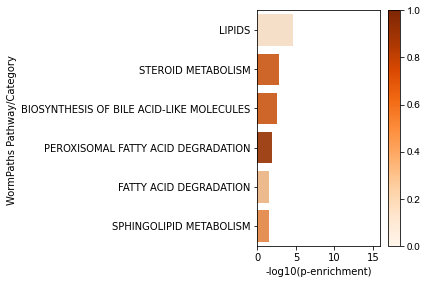

In [129]:
PlotSignificantPathwayEnrichment(SignificantPathwayEnrichment,title='ClassAOverallRegulated',cutoff=0.05)

## Pathways enriched in 25% of the regulated

In [160]:
EnrichedPathwaysModeratelyVariant=pd.read_csv("ModeratelyVariant_PathwayEnrich.csv",index_col=0)

In [134]:
Enri

Index(['Category', 'n_Genes', 'n_Hits', 'Enrichment score (n_Hits/n_Genes)',
       'p_enrichment', '-log10(p_enrichment)', 'p_depletion',
       '-log10(p_depletion)', 'Hits'],
      dtype='object')

In [156]:
EnrichedPathwaysModeratelyVariant=EnrichedPathwaysModeratelyVariant[EnrichedPathwaysModeratelyVariant.index=='LEVEL 4']

In [145]:
EnrichedPathwaysModeratelyVariant.sort_values(ascending=False,inplace=True,by=['-log10(p_enrichment)'])

In [161]:
EnrichedPathwaysModeratelyVariant=EnrichedPathwaysModeratelyVariant[EnrichedPathwaysModeratelyVariant.p_enrichment<=0.05]

In [155]:
EnrichedPathwaysModeratelyVariant

,Category,n_Genes,n_Hits,Enrichment score (n_Hits/n_Genes),p_enrichment,-log10(p_enrichment),p_depletion,-log10(p_depletion),Hits
Level,,,,,,,,,
LEVEL 2,ELECTRON TRANSPORT CHAIN,88,79,0.90,8.600000e-33,32.10,1.0,0.0,C16A3.5;C18E9.4;C25H3.9;C33A12.1;C34B2.8;D2030...
LEVEL 1,ENERGY,139,96,0.69,1.300000e-22,21.90,1.0,0.0,C16A3.5;C18E9.4;C25H3.9;C33A12.1;C34B2.8;D2030...
LEVEL 3,ETC-COMPLEX I,40,39,0.97,1.200000e-19,18.90,1.0,0.0,C16A3.5;C18E9.4;C25H3.9;C33A12.1;C34B2.8;D2030...
LEVEL 4,ETC-COMPLEX I,40,39,0.97,1.200000e-19,18.90,1.0,0.0,C16A3.5;C18E9.4;C25H3.9;C33A12.1;C34B2.8;D2030...
LEVEL 2,AMINOACYL-TRNA BIOSYNTHESIS,39,26,0.67,3.600000e-06,5.44,1.0,0.0,C39B5.6;Y105E8A.20;Y41D4A.6;aars-1;aars-2;cars...
LEVEL 3,AMINOACYL-TRNA BIOSYNTHESIS,39,26,0.67,3.600000e-06,5.44,1.0,0.0,C39B5.6;Y105E8A.20;Y41D4A.6;aars-1;aars-2;cars...
LEVEL 4,AMINOACYL-TRNA BIOSYNTHESIS,39,26,0.67,3.600000e-06,5.44,1.0,0.0,C39B5.6;Y105E8A.20;Y41D4A.6;aars-1;aars-2;cars...
LEVEL 3,ETC-COMPLEX V,18,15,0.83,6.000000e-06,5.22,1.0,0.0,F58F12.1;H28O16.1;R04F11.2;R05D3.6;R53.4;Y69A2...
LEVEL 4,ETC-COMPLEX V,18,15,0.83,6.000000e-06,5.22,1.0,0.0,F58F12.1;H28O16.1;R04F11.2;R05D3.6;R53.4;Y69A2...


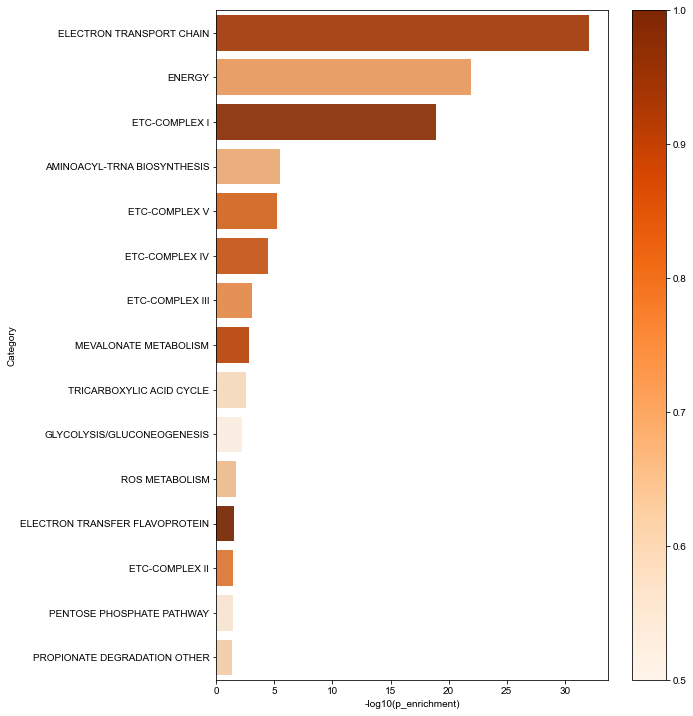

In [162]:
fig=plt.figure(figsize=(10,10))
import seaborn as sns
g = EnrichedPathwaysModeratelyVariant.reset_index()
survival_rates = g['Enrichment score (n_Hits/n_Genes)'].mean()
n = g['-log10(p_enrichment)']
# cMAP=sns.diverging_palette(220, 20, as_cmap=True)

norm = plt.Normalize(g['Enrichment score (n_Hits/n_Genes)'].min(), g['Enrichment score (n_Hits/n_Genes)'].max())
sm = plt.cm.ScalarMappable(cmap="Oranges", norm=norm)
sm.set_array([])

ax = sns.barplot(x='-log10(p_enrichment)', y='Category', 
                 hue='Enrichment score (n_Hits/n_Genes)', palette="Oranges", 
                 dodge=False,data=g)

ax.set_ylabel('Category')

ax.get_legend().remove()
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
plt.tight_layout()
ax.figure.colorbar(sm)
plt.savefig("ModeratelyVariantPathwayEnrichment.svg",dpi=300)

## Phenotypes

In [ ]:
EnrichedPhenotypesModeratelyvariant=pd.read_csv("ModeratelyVariantGenesPhenotypeEnrichment.csv",index_col=0)

In [ ]:
EnrichedPhenotypesModeratelyvariant.columns

In [ ]:
EnrichedPhenotypesModeratelyvariant.sort_values(ascending=False,inplace=True,by=['-log10(BH-FDR Corrected FDR)'])

In [ ]:
fig=plt.figure(figsize=(10,10))
import seaborn as sns
g = EnrichedPhenotypesModeratelyvariant.reset_index()
survival_rates = g['Enrichment fold change'].mean()
n = g['-log10(BH-FDR Corrected FDR)']
# cMAP=sns.diverging_palette(220, 20, as_cmap=True)

norm = plt.Normalize(g['Enrichment fold change'].min(), g['Enrichment fold change'].max())
sm = plt.cm.ScalarMappable(cmap="Oranges", norm=norm)
sm.set_array([])

ax = sns.barplot(x='-log10(BH-FDR Corrected FDR)', y='Phenotype Name', 
                 hue='Enrichment fold change', palette="Oranges", 
                 dodge=False,data=g)

ax.set_ylabel('Phenotype Name')

ax.get_legend().remove()
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
plt.tight_layout()
ax.figure.colorbar(sm)
plt.savefig("ModeratelyVariantPhenotypeEnrichment.svg",dpi=300)

In [ ]:
DepletedPhenotypes=RegulatedGenes[RegulatedGenes['Enrichment fold change']<1]

In [ ]:
EnrichedPhenotypes=RegulatedGenes[RegulatedGenes['Enrichment fold change']>1]

In [ ]:
EnrichedPhenotypes.columns

In [ ]:
EnrichedPhenotypes.sort_values(ascending=False,inplace=True,by=['-log10(BH FDR-corrected p-value)'])

In [ ]:
DepletedPhenotypes.sort_values(by=['-log10(BH FDR-corrected p-value)'],ascending=False)

In [ ]:
EnrichedDepletedPhenotypes=pd.concat([EnrichedPhenotypes,DepletedPhenotypes])

In [ ]:
EnrichedDepletedPhenotypes.sort_values(ascending=False,inplace=True,by=['-log10(BH FDR-corrected p-value)'])

In [ ]:
EnrichedDepletedPhenotypes

In [ ]:
fig=plt.figure(figsize=(10,10))
import seaborn as sns
g = EnrichedPhenotypes.reset_index()
survival_rates = g['Enrichment fold change'].mean()
n = g['-log10(BH FDR-corrected p-value)']
# cMAP=sns.diverging_palette(220, 20, as_cmap=True)

norm = plt.Normalize(g['Enrichment fold change'].min(), g['Enrichment fold change'].max())
sm = plt.cm.ScalarMappable(cmap="Oranges", norm=norm)
sm.set_array([])

ax = sns.barplot(x='-log10(BH FDR-corrected p-value)', y='Phenotype Name', 
                 hue='Enrichment fold change', palette="Oranges", 
                 dodge=False,data=g)

ax.set_ylabel('Phenotype Name')

ax.get_legend().remove()
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
plt.tight_layout()
ax.figure.colorbar(sm)
plt.savefig("WormBasePhenotypeEnrichment.svg",dpi=300)

In [ ]:
DepletedPhenotypes.sort_values(ascending=False,inplace=True,by=['-log10(BH FDR-corrected p-value)'])

In [ ]:
DepletedPhenotypes['Enrichment fold change']=1-DepletedPhenotypes['Enrichment fold change']

In [ ]:
fig=plt.figure(figsize=(10,10))
import seaborn as sns
g = DepletedPhenotypes.reset_index()
survival_rates = g['Enrichment fold change'].mean()
n = g['-log10(BH FDR-corrected p-value)']
# cMAP=sns.diverging_palette(220, 20, as_cmap=True)

norm = plt.Normalize(g['Enrichment fold change'].min(), g['Enrichment fold change'].max())
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])

ax = sns.barplot(x='-log10(BH FDR-corrected p-value)', y='Phenotype Name', 
                 hue='Enrichment fold change', palette="Blues", 
                 dodge=False,data=g)

ax.set_ylabel('Phenotype Name')

ax.get_legend().remove()
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
plt.tight_layout()
ax.figure.colorbar(sm)
plt.savefig("WormBasePhenotypeDepleted.svg",dpi=300)

In [ ]:
DepletedPhenotypes['-log10(BH FDR-corrected p-value)']=-1*(DepletedPhenotypes['-log10(BH FDR-corrected p-value)'])

In [ ]:
fig=plt.figure(figsize=(10,10))
import seaborn as sns
g = EnrichedDepletedPhenotypes.reset_index()
survival_rates = g['Enrichment fold change'].mean()
n = g['-log10(BH FDR-corrected p-value)']
# cMAP=sns.diverging_palette(220, 20, as_cmap=True)

norm = plt.Normalize(g['Enrichment fold change'].min(), g['Enrichment fold change'].max())
sm = plt.cm.ScalarMappable(cmap="vlag", norm=norm)
sm.set_array([])

ax = sns.barplot(x='-log10(BH FDR-corrected p-value)', y='Phenotype Name', 
                 hue='Enrichment fold change', palette="vlag", 
                 dodge=False,data=g)

ax.set_ylabel('Phenotype Name')

ax.get_legend().remove()
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
plt.tight_layout()
ax.figure.colorbar(sm)
plt.savefig("WormBasePhenotypeEnrichmentDepletion.svg",dpi=300)

## Quadrant-wise enrichment analysis

### WormPaths

In [7]:
!ls

AllLowExpGenes_KimTissue.csv
ClassAQuadrant1.csv
ClassAQuadrant1PEA.txt
ClassAQuadrant1PEA.xls
ClassAQuadrant1PEA.xlsx
ClassAQuadrant2.csv
ClassAQuadrant2PEA.txt
~$ClassAQuadrant2PEA.xlsx
ClassAQuadrant2PEA.xlsx
ClassAQuadrant3.csv
ClassAQuadrant3PEA.txt
~$ClassAQuadrant3PEA.xlsx
ClassAQuadrant3PEA.xlsx
ClassAQuadrant4.csv
ClassAQuadrant4PEA.txt
~$ClassAQuadrant4PEA.xlsx
ClassAQuadrant4PEA.xlsx
ClassARegulatedAllDatasets.csv
ClassARegulatedMetabolic_021223.csv
ClassARegulatedMetabolic.csv
CombinedCV_fraction_021223.csv
MetabolicCVDevelopmentTissueScatterPlot.svg
MetabolicLowExpGenes_KimTissue.csv
NonMetabolicGenes_total.csv
NonMetabolicLowExpGenes_KimTissue.csv
NonRegulated_Metabolic_021223.csv
Quadrant1.csv
Quadrant2.csv
Quadrant3.csv
Quadrant4.csv
QuadrantVSCV.csv
Regulated_AllDatasets_wb.csv
RegulatedMetabolic_021222.csv
RegulatedMetabolic_021223.csv
RegulatedMetabolic_022322.csv
RegulatedMetabolic.csv
RegulatedMetabolic_KimTissue_AllDatasets.csv
RegulatedMetabolic_Kim_wb.csv
Regula

In [13]:
ClassAQuadrant1Pathway=pd.read_excel("ClassAQuadrant1PEA.xlsx",index_col=1)

In [14]:
ClassAQuadrant1Pathway

,Level,n_Genes,n_Hits,Enrichment score (n_Hits/n_Genes),p_enrichment,-log10(p_enric,p_depletion,Hits
Category,,,,,,,,
ELECTRON TRANSPORT CHAIN,LEVEL 2,88,65,0.74,2.500000e-19,18.602060,1.000000,C16A3.5;C18E9.4;C25H3.9;C33A12.1;C34B2.8;D2030...
ENERGY,LEVEL 1,139,82,0.59,6.500000e-15,14.187087,1.000000,C16A3.5;C18E9.4;C25H3.9;C33A12.1;C34B2.8;D2030...
ETC-COMPLEX I,LEVEL 3,40,32,0.80,1.800000e-11,10.744727,1.000000,C16A3.5;C18E9.4;C25H3.9;C33A12.1;C34B2.8;D2030...
ETC-COMPLEX I,LEVEL 4,40,32,0.80,1.800000e-11,10.744727,1.000000,C16A3.5;C18E9.4;C25H3.9;C33A12.1;C34B2.8;D2030...
AMINOACYL-TRNA BIOSYNTHESIS,LEVEL 2,39,26,0.67,9.100000e-07,6.040959,1.000000,C39B5.6;Y41D4A.6;aars-1;aars-2;cars-1;dars-1;e...
...,...,...,...,...,...,...,...,...
PROPIONATE DEGRADATION SHUNT,LEVEL 4,5,0,0.00,1.000000e+00,0.000000,0.180000,NaN
GLYOXYLATE AND DICARBOXYLATE METABOLISM,LEVEL 4,5,0,0.00,1.000000e+00,0.000000,0.180000,NaN
GUANYLATE CYCLASE,LEVEL 2,27,0,0.00,1.000000e+00,0.000000,0.000082,NaN


In [15]:
ClassAQuadrant2Pathway=pd.read_excel("ClassAQuadrant2PEA.xlsx",index_col=1)
ClassAQuadrant3Pathway=pd.read_excel("ClassAQuadrant3PEA.xlsx",index_col=1)
ClassAQuadrant4Pathway=pd.read_excel("ClassAQuadrant4PEA.xlsx",index_col=1)

In [16]:
ClassAQuadrant1Pathway

,Level,n_Genes,n_Hits,Enrichment score (n_Hits/n_Genes),p_enrichment,-log10(p_enric,p_depletion,Hits
Category,,,,,,,,
ELECTRON TRANSPORT CHAIN,LEVEL 2,88,65,0.74,2.500000e-19,18.602060,1.000000,C16A3.5;C18E9.4;C25H3.9;C33A12.1;C34B2.8;D2030...
ENERGY,LEVEL 1,139,82,0.59,6.500000e-15,14.187087,1.000000,C16A3.5;C18E9.4;C25H3.9;C33A12.1;C34B2.8;D2030...
ETC-COMPLEX I,LEVEL 3,40,32,0.80,1.800000e-11,10.744727,1.000000,C16A3.5;C18E9.4;C25H3.9;C33A12.1;C34B2.8;D2030...
ETC-COMPLEX I,LEVEL 4,40,32,0.80,1.800000e-11,10.744727,1.000000,C16A3.5;C18E9.4;C25H3.9;C33A12.1;C34B2.8;D2030...
AMINOACYL-TRNA BIOSYNTHESIS,LEVEL 2,39,26,0.67,9.100000e-07,6.040959,1.000000,C39B5.6;Y41D4A.6;aars-1;aars-2;cars-1;dars-1;e...
...,...,...,...,...,...,...,...,...
PROPIONATE DEGRADATION SHUNT,LEVEL 4,5,0,0.00,1.000000e+00,0.000000,0.180000,NaN
GLYOXYLATE AND DICARBOXYLATE METABOLISM,LEVEL 4,5,0,0.00,1.000000e+00,0.000000,0.180000,NaN
GUANYLATE CYCLASE,LEVEL 2,27,0,0.00,1.000000e+00,0.000000,0.000082,NaN


In [25]:
def SignificantPathwayEnrichment(ClassAQuadrant1Pathway):
    PathwayEnrichmentRegulated1=ClassAQuadrant1Pathway[~ClassAQuadrant1Pathway.index.duplicated(keep='first')]
    pvalse=PathwayEnrichmentRegulated1.p_enrichment
    PathwayEnrichmentRegulated1['FDR-corrected p-enrichment']=(st.stats.multitest.fdrcorrection(pvalse, alpha=0.05, method='indep', 
                                                                                           is_sorted=False))[1]
    SignificantPathwayEnrichment1=PathwayEnrichmentRegulated1[['Enrichment score (n_Hits/n_Genes)',
                                                           'p_enrichment','FDR-corrected p-enrichment']]
    SignificantPathwayEnrichment1['-log10(p-enrichment)']=-(np.log10(SignificantPathwayEnrichment1['p_enrichment']))
    
    return SignificantPathwayEnrichment1

def PlotSignificantPathwayEnrichment(SignificantPathwayEnrichment1,title):
    import seaborn as sns
    SignificantPathwayEnrichment1=SignificantPathwayEnrichment1[(SignificantPathwayEnrichment1['p_enrichment']<=0.05)]
    g = SignificantPathwayEnrichment1.reset_index()
    survival_rates = g['Enrichment score (n_Hits/n_Genes)'].mean()
    n = g['-log10(p-enrichment)']

    norm = plt.Normalize(0,1)
    sm = plt.cm.ScalarMappable(cmap="Oranges", norm=norm)
    sm.set_array([])

    ax = sns.barplot(x='-log10(p-enrichment)', y='Category', 
                 hue='Enrichment score (n_Hits/n_Genes)', palette='Oranges', 
                 dodge=False,data=g)

    ax.set_ylabel('WormPaths Pathway/Category ')
#     plt.xlim(0,16)

    ax.get_legend().remove()
    from matplotlib import rcParams
    rcParams['font.family'] = 'Arial'
    plt.tight_layout()
    ax.figure.colorbar(sm)
    plt.savefig("WormPathsEnrichment_{}.svg".format(title),dpi=300)

                                                               

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


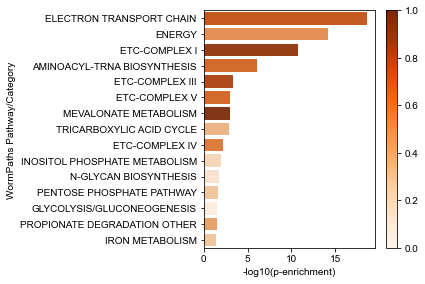

In [26]:
SignificantPathwayEnrichment1=SignificantPathwayEnrichment(ClassAQuadrant1Pathway)
PlotSignificantPathwayEnrichment(SignificantPathwayEnrichment1,title='ClassAQuadrant1_0.01')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


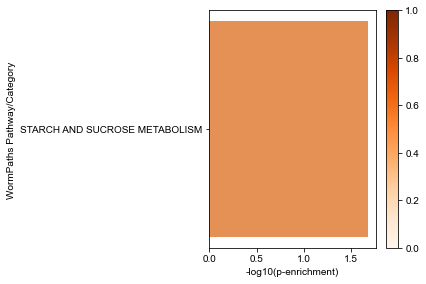

In [27]:
SignificantPathwayEnrichment2=SignificantPathwayEnrichment(ClassAQuadrant2Pathway)
PlotSignificantPathwayEnrichment(SignificantPathwayEnrichment2,title='ClassAQuadrant2_0.01')

In [ ]:
SignificantPathwayEnrichment2

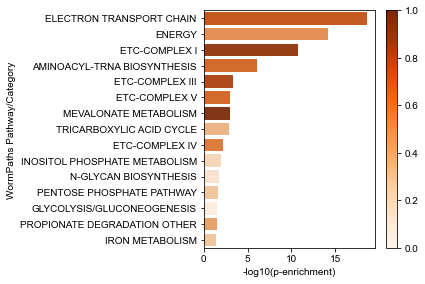

In [28]:
PlotSignificantPathwayEnrichment(SignificantPathwayEnrichment1,title='ClassAQuadrant1_0.01')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


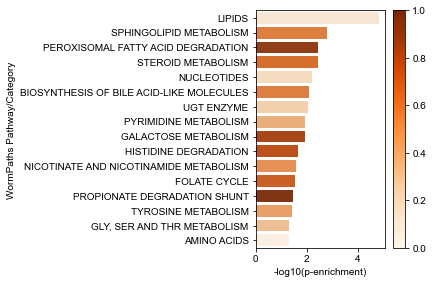

In [29]:
SignificantPathwayEnrichment3=SignificantPathwayEnrichment(ClassAQuadrant3Pathway)
PlotSignificantPathwayEnrichment(SignificantPathwayEnrichment3,title='ClassAQuadrant3_0.03')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


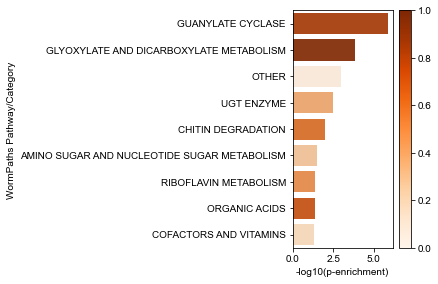

In [30]:
SignificantPathwayEnrichment4=SignificantPathwayEnrichment(ClassAQuadrant4Pathway)
PlotSignificantPathwayEnrichment(SignificantPathwayEnrichment4,title='ClassAQuadrant4_0.03')

In [ ]:
SignificantPathwayEnrichment4[0:50]

In [ ]:
SignificantPathwayEnrichment3[]

## Regulated genes

In [ ]:
MetabolicRegulatedGenes=pd.read_csv("RegulatedMetabolic_KimTissue_AllDatasets.csv",index_col=0)

In [ ]:
MetabolicRegulatedGenes

## Checking which regulated metabolic genes have stress-response variants

In [ ]:
StressResponse=pd.read_csv("StressRespone_genes_direct_and_inferred_for_WBPhenotype_0000067.txt",index_col=0,
                           sep='\t',header=None)

In [ ]:
MetabolicStressResponse=list(set(StressResponse.index).intersection(set(MetabolicRegulatedGenes.index)))

In [ ]:
MetabolicStressResponse=MetabolicRegulatedGenes.loc[MetabolicStressResponse]

In [ ]:
MetabolicStressResponse

In [ ]:
def wb_to_gene(matrix):
    mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',index_col=1)
    mapper_df=mapper_df.loc[mapper_df.index.dropna()]
    wb_to_gene = {};
    for wb in mapper_df.index:
        wb_to_gene[wb] = str(mapper_df.loc[wb]['GeneName']);
    matrix=matrix.rename(index=wb_to_gene,columns=wb_to_gene)
    return matrix

def gene_to_wb(matrix):
    mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',index_col=2)
    mapper_df=mapper_df.loc[mapper_df.index.dropna()]
    gene_to_wb = {};
    for gene in mapper_df.index:
        gene_to_wb[gene] = str(mapper_df.loc[gene]['WormBaseID']);
    matrix=matrix.rename(index=gene_to_wb,columns=gene_to_wb)
    return matrix

In [ ]:
MetabolicStressResponse=wb_to_gene(MetabolicStressResponse)

In [ ]:
MetabolicStressResponse=gene_to_wb(MetabolicStressResponse)

## Reading CV of all genes across all datasets

In [ ]:
CV_alldatasets=pd.read_csv("/data/nandas/Transcription/AllDatasets_012422/CV_allgenes.csv",index_col=0)

In [ ]:
CV_alldatasets

In [ ]:
MetabolicClasses=pd.read_csv("/data/nandas/MetabolicClasses_August_SN_090221.csv",index_col=0)
metabolicCV=list(set(MetabolicClasses.index).intersection(set(CV_alldatasets.index)))

In [ ]:
metabolicCV

In [ ]:
MetabolicCV=CV_alldatasets.loc[metabolicCV]

In [ ]:
# MetabolicCV=MetabolicCV['Max_CV']

In [ ]:
metabolicCVall=list(set(MetabolicRegulatedGenes.index).intersection(set(CV_alldatasets.index)))
MetabolicRegulated_CV_alldatasets=CV_alldatasets.loc[metabolicCVall]

In [ ]:
MetabolicRegulated_CV_alldatasets.replace(np.NaN,-6,inplace=True)

In [ ]:
MetabolicRegulated_CV_alldatasets

In [ ]:
data=MetabolicRegulated_CV_alldatasets.transpose()
data=wb_to_gene(data)

In [ ]:
data=data.loc['Max_CV']

In [ ]:
data=pd.DataFrame(data)

In [ ]:
data.sort_values(ascending=False,by=['Max_CV'],inplace=True)

In [ ]:
data[data.Max_CV>=0.75]

In [ ]:
data

## Adding variation score and Tissue CV to list of regulated metabolic genes


In [ ]:
VS=pd.read_csv(Kim_dir+"BinningVS.csv",index_col=0)

In [ ]:
CoefVar=pd.read_csv(Tissue_dir+"CoefVarHighModTissue.csv",
                    index_col=0)

In [ ]:
MetabolicCV['Variation Score']=VS['Variation Score']

In [ ]:
MetabolicCV['CV across tissues']=CoefVar['CoefVar']

In [ ]:
MetabolicCV=MetabolicCV[['Max_CV','Variation Score','CV across tissues']]

In [ ]:
df=MetabolicCV
normalized_df=(df-df.mean())/df.std()
normalized_df.replace(np.NaN,-6,inplace=True)
normalized_df.rename(columns={'Max_CV':'Max CV across datasets'},inplace=True)

In [ ]:
normalized_df

In [ ]:
# normalized_df=normalized_df.transpose()
mrg=list(set(MetabolicRegulatedGenes.index).intersection(set(normalized_df.index)))
MetabolicRegulatedGenes_CV=normalized_df.loc[mrg]

In [ ]:
sns.clustermap(MetabolicRegulatedGenes_CV,mask=MetabolicRegulatedGenes_CV==-6,
               vmin=-2,vmax=2,cmap='vlag',figsize=(5,30))
plt.tight_layout()

In [ ]:
# Invariantgenes=normalized_df.loc[InvariantCV.index]

In [ ]:
Ivg=list(set())

In [ ]:
normalized_df=normalized_df.transpose()

In [ ]:
normalized_df.min().min()

In [ ]:
MetabolicRegulatedGenes

In [ ]:
sns.clustermap(normalized_df,mask=normalized_df==-6,
               vmin=-2,vmax=2,cmap='vlag',row_cluster=False,figsize=(30,5))
plt.tight_layout()

In [ ]:
VS

In [ ]:
CoefVar

In [ ]:
CoefVar.columns

In [ ]:
data=gene_to_wb(data)

In [ ]:
data['Variation Score']=VS['Variation Score']

In [ ]:
data['CV across tissues']=CoefVar['CoefVar']

In [ ]:
data.rename(columns={'Max_CV':'Max CV across datasets'},inplace=True)

In [ ]:
data.replace(np.NaN,-6,inplace=True)

In [ ]:
data=data.transpose()

In [ ]:
data=wb_to_gene(data)

In [ ]:
sns.clustermap(data,mask=data==-6,
               vmin=0,vmax=2,cmap='YlOrRd',row_cluster=False,figsize=(50,10))
plt.tight_layout()

## Plotting invariant genes

In [ ]:
Invariantgenes=pd.read_csv("/data/nandas/Transcription/AllDatasets_012422/Bin1_AllDatasets.csv",index_col=0)

In [ ]:
invariantcv=list(set(Invariantgenes.index).intersection(set(CV_alldatasets.index)))

In [ ]:
InvariantCV=CV_alldatasets.loc[invariantcv]

In [ ]:
InvariantCV.replace(np.NaN,-6,inplace=True)

In [ ]:
data2=InvariantCV.transpose()
data2=wb_to_gene(data2)

In [ ]:
sns.clustermap(data2,mask=data2==-6,
               vmin=0,vmax=0.75,cmap='YlOrRd')
plt.tight_layout()

In [ ]:
data2.index

## Lipid enrichment


In [ ]:
PathwayEnrichmentRegulated=pd.read_csv("Lipid_metabolism_PEA.xlsx - lipid.csv",index_col=0)

In [ ]:
PathwayEnrichmentRegulated

In [ ]:
import statsmodels as st
import statsmodels.api as sm
PathwayEnrichmentRegulated=pd.read_csv("Lipid_metabolism_PEA.xlsx - lipid.csv",index_col=0)
PathwayEnrichmentRegulated.set_index(['Category'],inplace=True)
PathwayEnrichmentRegulated=PathwayEnrichmentRegulated[~PathwayEnrichmentRegulated.index.duplicated(keep='first')]
pvalse=PathwayEnrichmentRegulated.p_enrichment
PathwayEnrichmentRegulated['FDR-corrected p-enrichment']=(st.stats.multitest.fdrcorrection(pvalse, alpha=0.05, method='indep', 
                                                                                           is_sorted=False))[1]
SignificantPathwayEnrichment=PathwayEnrichmentRegulated[['Enrichment score (n_Hits/n_Genes)',
                                                           'p_enrichment']]
SignificantPathwayEnrichment['-log10(p-enrichment)']=-(np.log10(SignificantPathwayEnrichment['p_enrichment']))

In [ ]:
SignificantPathwayEnrichment=SignificantPathwayEnrichment[SignificantPathwayEnrichment.p_enrichment<=0.25]

In [ ]:
import seaborn as sns
g = SignificantPathwayEnrichment.reset_index()
survival_rates = g['Enrichment score (n_Hits/n_Genes)'].mean()
n = g['-log10(p-enrichment)']

norm = plt.Normalize(g['Enrichment score (n_Hits/n_Genes)'].min(), g['Enrichment score (n_Hits/n_Genes)'].max())
sm = plt.cm.ScalarMappable(cmap="Oranges", norm=norm)
sm.set_array([])

ax = sns.barplot(x='-log10(p-enrichment)', y='Category', 
                 hue='Enrichment score (n_Hits/n_Genes)', palette='Oranges', 
                 dodge=False,data=g)

ax.set_ylabel('WormPaths Pathway/Category ')

ax.get_legend().remove()
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
plt.tight_layout()
ax.figure.colorbar(sm)
plt.savefig("WormPathsEnrichment_lipids_alldatasets.svg",dpi=300)